In [9]:
from pprint import pprint

#### Iterating through List

In [1]:
numbers = [45, 22, 14, 65, 97, 72]

for idx, number in enumerate(numbers):
    if idx % 3 == 0 and idx % 5 == 0:
        numbers[idx] = "fizzbuzz"
    elif idx % 3 == 0:
        numbers[idx] = "fizz"
    elif idx % 5 == 0:
        numbers[idx] = "buzz"

print("after replacement:", numbers)

after replacement: ['fizzbuzz', 22, 14, 'fizz', 97, 'buzz']


In [2]:
# with start parameter of enumerate, we access all of the same elements of list, but starting from different index

for idx, number in enumerate(numbers, start=2):
    print(idx, number)

2 fizzbuzz
3 22
4 14
5 fizz
6 97
7 buzz


#### Debug With breakpoint() Instead of print()

#### Save Memory With Generators

In [7]:
## instead of using list comprehension, where the creation of list requires memory resources
print("not memory efficient with list comprehension:", sum([i * i for i in range(1, 1001)]))

# try to use the generator expression as below, the design allows generators to be used on massive sequences of data, because only one element exists in memory at a time.
print("with generator:", sum((i * i for i in range(1, 1001))))

not memory efficient with list comprehension: 333833500
with generator: 333833500


#### Handle Missing Dictionary Keys With collections.defaultdict()

In [8]:
grades = [
...     ('elliot', 91),
...     ('neelam', 98),
...     ('bianca', 81),
...     ('elliot', 88),
... ]

In [10]:
from collections import defaultdict

# We can leveraging a defaultdict can lead to cleaner application code because you don’t have to worry about default values at the key level. 
# Instead, you can handle them once at the defaultdict level and afterwards act as if the key is always present.

student_grades = defaultdict(list)
for name, grade in grades:
    student_grades[name].append(grade)

print("student grades aggregated:", student_grades)

student grades aggregated: defaultdict(<class 'list'>, {'elliot': [91, 88], 'neelam': [98], 'bianca': [81]})


#### Generate Permutations and Combinations With itertools

In [13]:
import itertools
friends = ['Monique', 'Ashish', 'Devon', 'Bernie']
print("pair any two friends, bidirectional relations:", list(itertools.permutations(friends, 2)))

pair any two friends, bidirectional relations: [('Monique', 'Ashish'), ('Monique', 'Devon'), ('Monique', 'Bernie'), ('Ashish', 'Monique'), ('Ashish', 'Devon'), ('Ashish', 'Bernie'), ('Devon', 'Monique'), ('Devon', 'Ashish'), ('Devon', 'Bernie'), ('Bernie', 'Monique'), ('Bernie', 'Ashish'), ('Bernie', 'Devon')]


In [15]:
print("unique pair of friends:", list(itertools.combinations(friends, r=2)))

unique pair of friends: [('Monique', 'Ashish'), ('Monique', 'Devon'), ('Monique', 'Bernie'), ('Ashish', 'Devon'), ('Ashish', 'Bernie'), ('Devon', 'Bernie')]


#### immutable vs hashable

#### Relational vs non-relational  DB

##### working on relationship db example

In [1]:
import sqlite3

db = sqlite3.connect(':memory:')  # Using an in-memory database
cur = db.cursor()

In [2]:
## create tables
cur.execute('''CREATE TABLE IF NOT EXISTS Customer (
                id integer PRIMARY KEY,
                firstname varchar(255),
                lastname varchar(255) )''')
cur.execute('''CREATE TABLE IF NOT EXISTS Item (
                id integer PRIMARY KEY,
                title varchar(255),
                price decimal )''')
cur.execute('''CREATE TABLE IF NOT EXISTS BoughtItem (
                ordernumber integer PRIMARY KEY,
                customerid integer,
                itemid integer,
                price decimal,
                CONSTRAINT customerid
                    FOREIGN KEY (customerid) REFERENCES Customer(id),
                CONSTRAINT itemid
                    FOREIGN KEY (itemid) REFERENCES Item(id) )''')

In [3]:
###populate table with data
cur.execute('''INSERT INTO Customer(firstname, lastname)
               VALUES ('Bob', 'Adams'),
                      ('Amy', 'Smith'),
                      ('Rob', 'Bennet');''')
cur.execute('''INSERT INTO Item(title, price)
               VALUES ('USB', 10.2),
                      ('Mouse', 12.23),
                      ('Monitor', 199.99);''')
cur.execute('''INSERT INTO BoughtItem(customerid, itemid, price)
               VALUES (1, 1, 10.2),
                      (1, 2, 12.23),
                      (1, 3, 199.99),
                      (2, 3, 180.00),
                      (3, 2, 11.23);''') # Discounted price 

In [4]:
cur.execute('''SELECT itemid, AVG(price) FROM BoughtItem GROUP BY itemid''')
print(cur.fetchall())

[(1, 10.2), (2, 11.73), (3, 189.995)]


In [10]:
### use EXPLAIN QUERY PLAN to describe the steps the database takes to execute the query
cur.execute('''EXPLAIN QUERY PLAN SELECT customer.firstname, item.title, 
                item.price, boughtitem.price FROM BoughtItem as boughtitem
                INNER JOIN Customer as customer on (customer.id = boughtitem.customerid)
                INNER JOIN Item as item on (item.id = boughtitem.itemid)''')
pprint(cur.fetchall())

[(4, 0, 0, 'SCAN TABLE BoughtItem AS boughtitem'),
 (6,
  0,
  0,
  'SEARCH TABLE Customer AS customer USING INTEGER PRIMARY KEY (rowid=?)'),
 (9, 0, 0, 'SEARCH TABLE Item AS item USING INTEGER PRIMARY KEY (rowid=?)')]


##### working on non-relational example

In [15]:
# !pip install pymongo
import pymongo
client = pymongo.MongoClient('localhost', 27017)

In [17]:
# Note: This database is not created until it is populated by some data
db = client["example_database"]

customers = db["customers"]
items = db["items"]

customers_data = [{ "firstname": "Bob", "lastname": "Adams" },
                  { "firstname": "Amy", "lastname": "Smith" },
                  { "firstname": "Rob", "lastname": "Bennet" },]
items_data = [{ "title": "USB", "price": 10.2 },
              { "title": "Mouse", "price": 12.23 },
              { "title": "Monitor", "price": 199.99 },]
customers.insert_many(customers_data)
items.insert_many(items_data)

In [ ]:
customers.distinct("firstname")

##### Common Aspects of the ETL Process and Big Data Workflows

#### Explore Data with Pandas 

In [1]:
import os
import pandas as pd
import requests
import urllib.parse as urlparse
# Jupyter notebooks will allow you to scroll all conlapsed data/column (...) with configuration as below
pd.set_option("display.max.columns", None)
# Set float column to display only two decimal
pd.set_option("display.precision", 2)

In [2]:
def read_df_from_csv_url(url, download_folder= None):
    "toDo: expand to more generic data reading func/class"
    target_csv_path = url.split("/")[-1]
    if download_folder:
        target_csv_path = os.path.join(download_folder, target_csv_path)

    response = requests.get(download_url)
    response.raise_for_status()    # Check that the request was successful
    with open(target_csv_path, "wb") as f:
        f.write(response.content)
    print("Download ready.")
    df = pd.read_csv(target_csv_path)
    return df

In [3]:
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
df_nba = read_df_from_csv_url(download_url)
df_nba.head(3)

Download ready.


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


In [6]:
#In the spring of 1992, two teams from Los Angeles had to play a home game at another court.
df_nba[(df_nba["_iscopy"] == 0) &
        (df_nba["team_id"].str.startswith("LA")) &
        (df_nba["year_id"]==1992) &
        (df_nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)"
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV"


In [13]:
df_nba[(df_nba['fran_id'] == 'Warriors') &
       (df_nba['year_id'] ==2015)].groupby(['game_result', 'is_playoffs']).game_id.count()

game_result  is_playoffs
L            0              15
             1               5
W            0              67
             1              16
Name: game_id, dtype: int64

In [17]:
df_nba["game_result"] = pd.Categorical(df_nba["game_result"])
df_nba['game_result'].head(2)

0    L
1    W
Name: game_result, dtype: category
Categories (2, object): [L, W]

In [18]:
 %matplotlib inline

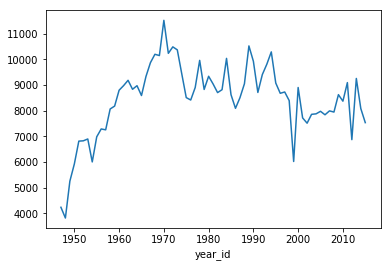

In [20]:
df_nba[df_nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

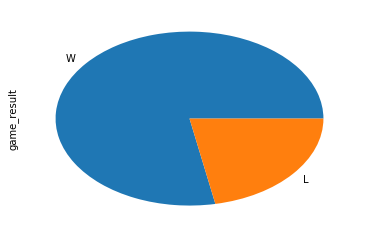

In [21]:
df_nba[(df_nba["fran_id"] == "Heat") &
    (df_nba["year_id"] == 2013)]["game_result"].value_counts().plot(kind="pie")